In [11]:
""" 
initialisation - imports and data loading
"""
# imports

import pandas
import datetime
from matplotlib import pyplot

# load data files and set columns names

events = pandas.read_csv("/ServersExercise/Data/connectivity_events.csv")
events.columns = ['date','device_id','user_id','server_id','connection_state']

servers = pandas.read_csv("/ServersExercise/Data/servers.csv")
servers.columns = ['id','created_at','destroyed_at']



In [2]:
""" 
configuration
"""

fleet_sizes = {
    1:[1,2],
    2:[3,9],
    3:[10,99],
    4:[100,999]   
}

In [ ]:
""" 
select first day from data

no need to run this!

not necessary, for whole program
kept here to be able to test app improvements on one day only.
"""

# events date to datetype
events['date'] = pandas.to_datetime(events['date'])

# create column with date only
events['date_only'] = events['date'].dt.date

# get first day date beggining and end
current_day = events.loc[0]['date_only']
next_day = current_day + datetime.timedelta(days=1)

# create one day mask - set True to events that are in selected timeframe
one_day_mask = (events['date_only'] >= current_day) & (events['date_only'] < next_day)

# select first day
one_day_events = events.loc[one_day_mask]


In [3]:
""" 
get data frame only with devices first connection
"""

# return list of devices first connection only
def get_first_connections(events_list):
    # list devices
    one_day_devices = events_list['device_id']
    
    # get dictionary of first device connection
    only_first_device_connection_dict = one_day_devices.drop_duplicates()
    
    # deictionary - data frame 
    only_first_device_connection = pandas.DataFrame(list(only_first_device_connection_dict.items()), columns = ['original_id','device'])
    return only_first_device_connection


In [4]:
"""
get data frame with events with devices first connection of 
"""

# return list of events with first connection only
def only_first_con_events(events_list):
    # get devices dictionary
    first_con_device_dict = get_first_connections(events_list)
    # build first connection events id's list
    first_con_ids = first_con_device_dict['original_id'].values.tolist()
    return events.iloc[first_con_ids]



In [5]:
"""
calculate number of devices for every user
"""

# calculate number of devices used by every user
def calculate_users_devices(events_list):
    # first device connection data set
    first_connections = only_first_con_events(events_list)
    # user:number of devices
    temp_dict = {}
    # build dictionary
    first_connections.apply(add_user_device, 'columns',  users_dict=temp_dict)
    return temp_dict
    


# fucntion used in apply to sum up number of users devices
def add_user_device(row, users_dict):
    user_index = row[2]
    device_index = row[1]
    if user_index in users_dict:
        users_dict[user_index] += 1
    else:
        users_dict[user_index] = 1

     

In [6]:
"""
match results with fleet sizes
"""

# set users to fleet sizes
def check_users_fleet_sizes(events_list):
    devices_dict = calculate_users_devices(events_list)
    # dictionary to df
    devices = pandas.DataFrame.from_dict(devices_dict, orient='index')
    # init dictonary with fleets sizes
    numbers_of_fleets = {
        1:0,
        2:0,
        3:0,
        4:0  
    } 

    
    devices.apply(assign_to_fleet_size, 'columns', fleets_dict=numbers_of_fleets)
    return numbers_of_fleets
    
    
# function used in apply to assign user to matching fleet size
def assign_to_fleet_size(row, fleets_dict):
    number_of_devices = row[0]
    for key in fleet_sizes:
        if check_fleet_size(number_of_devices,fleet_sizes[key]):
            fleets_dict[key] += 1
            break
            
    
# returns bolean if specified number of devices matches selected fleet size
def check_fleet_size(number_of_devices, fleet_description):
    return fleet_description[0] <= number_of_devices <= fleet_description[1]


In [7]:
"""
find number of days
"""
# first and last event date
first_day = events['date'][events.index[0]]
last_day = events['date'][events.index[-1]]
# convert those dates to datetime
first_day_datetime = pandas.to_datetime(first_day)
last_day_datetime = pandas.to_datetime(last_day)
# find timedelta
events_timedelta = last_day_datetime - first_day_datetime
# find number of days
number_of_days = events_timedelta.days


In [27]:
"""
iterate through all days to gather the data
"""

# events date to datetype
events['date'] = pandas.to_datetime(events['date'])
# create column with date only
events['date_only'] = events['date'].dt.date
# get first day
current_day = events.loc[0]['date_only']

all_days_list = []
# iterate through all days
for day in range(number_of_days):
    # get current day end
    next_day = current_day + datetime.timedelta(days=1)
    # create one day mask - set True to events that are in selected timeframe
    one_day_mask = (events['date_only'] >= current_day) & (events['date_only'] < next_day)
    # select first day
    one_day_events = events.loc[one_day_mask]
    # get fleet sizes
    fleet_size = check_users_fleet_sizes(one_day_events)
    
    all_days_list.append(fleet_size)
    print(fleet_size)
    current_day = next_day
    

# !!! ToDo
# matplotlib - list of dictionaries
    
    
    

{1: 47, 2: 10, 3: 1, 4: 1}
{1: 19, 2: 6, 3: 2, 4: 0}
{1: 30, 2: 5, 3: 2, 4: 0}
{1: 35, 2: 2, 3: 3, 4: 0}
{1: 26, 2: 3, 3: 2, 4: 0}
{1: 29, 2: 3, 3: 2, 4: 0}
{1: 13, 2: 4, 3: 2, 4: 0}
{1: 15, 2: 2, 3: 2, 4: 0}
{1: 24, 2: 3, 3: 2, 4: 0}
{1: 27, 2: 3, 3: 2, 4: 0}
{1: 33, 2: 3, 3: 2, 4: 0}
{1: 16, 2: 7, 3: 1, 4: 0}
{1: 31, 2: 3, 3: 2, 4: 0}
{1: 9, 2: 3, 3: 1, 4: 0}
{1: 10, 2: 3, 3: 1, 4: 0}
{1: 28, 2: 2, 3: 1, 4: 0}
{1: 21, 2: 6, 3: 1, 4: 0}
{1: 17, 2: 7, 3: 1, 4: 0}
{1: 19, 2: 5, 3: 1, 4: 0}
{1: 16, 2: 4, 3: 2, 4: 0}
{1: 11, 2: 3, 3: 1, 4: 0}
{1: 13, 2: 3, 3: 1, 4: 0}
{1: 22, 2: 3, 3: 3, 4: 0}
{1: 21, 2: 6, 3: 1, 4: 0}
{1: 20, 2: 5, 3: 1, 4: 0}
{1: 21, 2: 4, 3: 1, 4: 0}
{1: 24, 2: 4, 3: 1, 4: 0}
{1: 13, 2: 4, 3: 2, 4: 0}
{1: 8, 2: 4, 3: 1, 4: 0}
{1: 16, 2: 5, 3: 2, 4: 0}
{1: 22, 2: 2, 3: 1, 4: 0}
{1: 21, 2: 3, 3: 2, 4: 0}
{1: 16, 2: 5, 3: 2, 4: 0}
{1: 22, 2: 3, 3: 2, 4: 0}
{1: 15, 2: 1, 3: 2, 4: 0}
{1: 9, 2: 2, 3: 1, 4: 0}
{1: 16, 2: 2, 3: 3, 4: 0}
{1: 18, 2: 3, 3: 2, 4: 0}
{1: 12, 2: 4, 

{1: 42, 2: 10, 3: 3, 4: 0}
{1: 45, 2: 10, 3: 5, 4: 0}
{1: 41, 2: 7, 3: 5, 4: 0}
{1: 42, 2: 17, 3: 2, 4: 0}
{1: 39, 2: 10, 3: 3, 4: 0}
{1: 30, 2: 5, 3: 3, 4: 0}
{1: 27, 2: 4, 3: 2, 4: 0}
{1: 41, 2: 9, 3: 3, 4: 0}
{1: 41, 2: 11, 3: 5, 4: 0}
{1: 42, 2: 12, 3: 5, 4: 0}
{1: 50, 2: 6, 3: 5, 4: 0}
{1: 44, 2: 8, 3: 6, 4: 0}
{1: 29, 2: 6, 3: 2, 4: 0}
{1: 28, 2: 5, 3: 3, 4: 0}
{1: 40, 2: 7, 3: 4, 4: 0}
{1: 48, 2: 10, 3: 3, 4: 0}
{1: 44, 2: 8, 3: 5, 4: 0}
{1: 50, 2: 7, 3: 5, 4: 0}
{1: 45, 2: 10, 3: 3, 4: 0}
{1: 30, 2: 5, 3: 2, 4: 0}
{1: 32, 2: 3, 3: 1, 4: 0}
{1: 41, 2: 3, 3: 3, 4: 0}
{1: 45, 2: 11, 3: 3, 4: 0}
{1: 48, 2: 7, 3: 5, 4: 0}
{1: 39, 2: 7, 3: 4, 4: 0}
{1: 45, 2: 10, 3: 5, 4: 0}
{1: 31, 2: 8, 3: 1, 4: 0}
{1: 38, 2: 4, 3: 1, 4: 0}
{1: 53, 2: 5, 3: 5, 4: 1}
{1: 53, 2: 6, 3: 5, 4: 0}
{1: 55, 2: 9, 3: 4, 4: 0}
{1: 41, 2: 12, 3: 4, 4: 0}
{1: 44, 2: 13, 3: 3, 4: 0}
{1: 38, 2: 1, 3: 4, 4: 0}
{1: 33, 2: 5, 3: 2, 4: 0}
{1: 48, 2: 8, 3: 4, 4: 0}
{1: 70, 2: 8, 3: 5, 4: 0}
{1: 55, 2: 8, 3: 2, 4: 0}


{1: 87, 2: 19, 3: 5, 4: 0}
{1: 94, 2: 21, 3: 5, 4: 0}
{1: 87, 2: 19, 3: 5, 4: 0}
{1: 83, 2: 21, 3: 6, 4: 0}
{1: 85, 2: 15, 3: 3, 4: 0}
{1: 69, 2: 7, 3: 2, 4: 0}
{1: 63, 2: 15, 3: 2, 4: 0}
{1: 79, 2: 15, 3: 5, 4: 0}
{1: 85, 2: 17, 3: 4, 4: 0}
{1: 88, 2: 22, 3: 7, 4: 0}
{1: 86, 2: 23, 3: 4, 4: 0}
{1: 83, 2: 17, 3: 4, 4: 0}
{1: 203, 2: 50, 3: 24, 4: 1}
{1: 62, 2: 11, 3: 2, 4: 0}
{1: 88, 2: 17, 3: 5, 4: 0}
{1: 74, 2: 19, 3: 5, 4: 0}
{1: 81, 2: 20, 3: 5, 4: 0}
{1: 83, 2: 24, 3: 5, 4: 0}
{1: 81, 2: 21, 3: 6, 4: 0}
{1: 68, 2: 11, 3: 2, 4: 0}
{1: 61, 2: 10, 3: 2, 4: 0}
{1: 97, 2: 18, 3: 5, 4: 0}
{1: 87, 2: 27, 3: 5, 4: 0}
{1: 84, 2: 20, 3: 5, 4: 0}
{1: 84, 2: 22, 3: 5, 4: 0}
{1: 184, 2: 43, 3: 13, 4: 2}
{1: 188, 2: 45, 3: 12, 4: 2}
{1: 57, 2: 7, 3: 2, 4: 0}
{1: 84, 2: 14, 3: 7, 4: 0}
{1: 95, 2: 19, 3: 5, 4: 0}
{1: 80, 2: 19, 3: 6, 4: 0}
{1: 99, 2: 18, 3: 7, 4: 0}
{1: 90, 2: 22, 3: 7, 4: 0}
{1: 69, 2: 8, 3: 2, 4: 0}
{1: 63, 2: 12, 3: 2, 4: 0}
{1: 78, 2: 17, 3: 4, 4: 0}
{1: 98, 2: 22, 3: 5, 4: 0

{1: 360, 2: 108, 3: 49, 4: 8}
{1: 264, 2: 82, 3: 34, 4: 3}
{1: 209, 2: 60, 3: 22, 4: 3}
{1: 253, 2: 50, 3: 20, 4: 3}
{1: 291, 2: 78, 3: 37, 4: 4}
{1: 312, 2: 79, 3: 37, 4: 4}
{1: 259, 2: 78, 3: 36, 4: 3}
{1: 284, 2: 77, 3: 38, 4: 3}
{1: 255, 2: 76, 3: 34, 4: 5}
{1: 456, 2: 136, 3: 57, 4: 7}
{1: 285, 2: 66, 3: 25, 4: 3}
{1: 482, 2: 140, 3: 59, 4: 7}
{1: 284, 2: 76, 3: 42, 4: 3}
{1: 495, 2: 141, 3: 64, 4: 7}
{1: 282, 2: 82, 3: 40, 4: 2}
{1: 289, 2: 85, 3: 37, 4: 3}
{1: 199, 2: 58, 3: 22, 4: 3}
{1: 191, 2: 50, 3: 24, 4: 3}
{1: 257, 2: 77, 3: 37, 4: 3}
{1: 261, 2: 73, 3: 37, 4: 3}
{1: 263, 2: 78, 3: 42, 4: 4}
{1: 489, 2: 147, 3: 62, 4: 8}
{1: 251, 2: 62, 3: 39, 4: 3}
{1: 194, 2: 60, 3: 21, 4: 3}
{1: 175, 2: 47, 3: 16, 4: 2}
{1: 162, 2: 44, 3: 17, 4: 2}
{1: 209, 2: 58, 3: 19, 4: 2}
{1: 227, 2: 68, 3: 25, 4: 3}
{1: 328, 2: 86, 3: 37, 4: 4}
{1: 255, 2: 77, 3: 26, 4: 3}
{1: 291, 2: 84, 3: 34, 4: 4}
{1: 207, 2: 51, 3: 22, 4: 2}
{1: 196, 2: 49, 3: 20, 4: 2}
{1: 261, 2: 74, 3: 30, 4: 2}
{1: 248, 

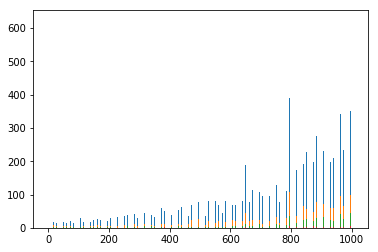

In [28]:
group1 = []
group2 = []
group3 = []
group4 = []
x = []
for ndx, day in enumerate(all_days_list):
    group1.append(day[1])
    group2.append(day[2])
    group3.append(day[3]) 
    group4.append(day[4])
    x.append(ndx)
    

ind = len(all_days_list)

width = 0.2
plot1 = pyplot.bar(x, group1, width)
plot2 =  pyplot.bar(x, group2, width)
plot3 = pyplot.bar(x, group3, width)
plot4 =  pyplot.bar(x, group4, width)
pyplot.show()
    
